## Pipelines that needs to be performed:

You need to perform the following eight major tasks to complete the assignment:

1.  Data loading

2. Text preprocessing

3. Exploratory data analysis (EDA)

4. Feature extraction

5. Topic modelling 

6. Model building using supervised learning

7. Model training and evaluation

8. Model inference

## Problem Statement 

You need to build a model that is able to classify customer complaints based on the products/services. By doing so, you can segregate these tickets into their relevant categories and, therefore, help in the quick resolution of the issue.

You will be doing topic modelling on the <b>.json</b> data provided by the company. Since this data is not labelled, you need to apply NMF to analyse patterns and classify tickets into the following five clusters based on their products/services:

* Credit card / Prepaid card

* Bank account services

* Theft/Dispute reporting

* Mortgages/loans

* Others 


With the help of topic modelling, you will be able to map each ticket onto its respective department/category. You can then use this data to train any supervised model such as logistic regression, decision tree or random forest. Using this trained model, you can classify any new customer complaint support ticket into its relevant department.

## Importing the necessary libraries

In [1]:
!pip install wordcloud

In [2]:
import json 
import numpy as np
import pandas as pd
import re, nltk, spacy, string
import en_core_web_sm
nlp = en_core_web_sm.load()
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.decomposition import NMF

from pprint import pprint

from wordcloud import WordCloud
pd.set_option('max_colwidth', 800)

import warnings
warnings.filterwarnings('ignore')

## Loading the data

The data is in JSON format and we need to convert it to a dataframe.

In [3]:
!gdown --id 1Y4Yzh1uTLIBLnJq1_QvoosFx9giiR1_K

Downloading...
From: https://drive.google.com/uc?id=1Y4Yzh1uTLIBLnJq1_QvoosFx9giiR1_K
To: /Users/akshat/Downloads/complaints-2021-05-14_08_16.json
83.4MB [01:21, 1.02MB/s]


In [4]:
# Opening JSON file 
f = open('complaints-2021-05-14_08_16.json')# Write the path to your data file and load it 

## Data preparation

In [5]:
data = json.load(f)
# returns JSON object as a dictionary 
df = pd.json_normalize(data)

In [6]:
# Inspect the dataframe to understand the given data.
df.head(10)

,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,...,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A
5,complaint-public-v2,complaint,3275312,0.0,Older American,48227,3275312,Managing an account,2019-06-13T12:00:00-05:00,MI,...,Closed with monetary relief,JPMORGAN CHASE & CO.,Referral,2019-06-14T12:00:00-05:00,None,Checking account,Yes,,Problem using a debit or ATM card,N/A
6,complaint-public-v2,complaint,3238804,0.0,None,76262,3238804,Managing an account,2019-05-10T12:00:00-05:00,TX,...,Closed with monetary relief,JPMORGAN CHASE & CO.,Phone,2019-05-10T12:00:00-05:00,None,Checking account,Yes,,Problem using a debit or ATM card,N/A
7,complaint-public-v2,complaint,3249272,0.0,None,07753,3249272,Trouble during payment process,2019-05-15T12:00:00-05:00,NJ,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-05-21T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,N/A
8,complaint-public-v2,complaint,3351653,0.0,None,60621,3351653,Closing an account,2019-08-22T12:00:00-05:00,IL,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-08-23T12:00:00-05:00,None,Checking account,Yes,,Company closed your account,N/A
9,complaint-public-v2,complaint,3273612,0.0,None,99354,3273612,Managing an account,2019-06-11T12:00:00-05:00,WA,...,Closed with monetary relief,JPMORGAN CHASE & CO.,Referral,2019-06-17T12:00:00-05:00,None,Checking account,Yes,,Cashing a check,N/A


In [7]:
#print the column names
for col in df.columns:
  print(col)

_index
_type
_id
_score
_source.tags
_source.zip_code
_source.complaint_id
_source.issue
_source.date_received
_source.state
_source.consumer_disputed
_source.product
_source.company_response
_source.company
_source.submitted_via
_source.date_sent_to_company
_source.company_public_response
_source.sub_product
_source.timely
_source.complaint_what_happened
_source.sub_issue
_source.consumer_consent_provided


In [8]:
#Assign new column names
df.rename(columns ={'_index': 'index', '_type': 'type', '_id': 'id', '_score': 'score', '_source.tags': 'source_tags', 
                    '_source.zip_code': 'source_zip_code', '_source.complaint_id': 'source_complaint_id',
                    '_source.complaint_id': 'source_complaint_id', '_source.issue': 'source_issue',
                    '_source.date_received': 'source_date_received', '_source.state': 'source_state',
                    '_source.consumer_disputed': 'source_consumer_disputed', '_source.product': 'source_product',
                    '_source.company_response': 'source_company_response', '_source.company': 'source_company',
                    '_source.submitted_via': 'source_submitted_via', '_source.date_sent_to_company': 'source_date_sent_to_company',
                    '_source.company_public_response': 'source_company_public_response', '_source.sub_product': 'source_sub_product',
                    '_source.timely': 'source_timely', '_source.complaint_what_happened': 'source_complaint_what_happened',
                    '_source.sub_issue': 'source_sub_issue', '_source.consumer_consent_provided': 'source_consumer_consent_provided'}, inplace = True)

In [9]:
#Assign nan in place of blanks in the complaints column
df[df['source_complaint_what_happened']== ''] = np.nan 

In [10]:
#Remove all rows where complaints column is nan
df = df[df['source_complaint_what_happened'].notnull()]

## Prepare the text for topic modeling

Once you have removed all the blank complaints, you need to:

* Make the text lowercase
* Remove text in square brackets
* Remove punctuation
* Remove words containing numbers


Once you have done these cleaning operations you need to perform the following:
* Lemmatize the texts
* Use POS tags to get relevant words from the texts.


In [11]:
# Write your function here to clean the text and remove all the unnecessary elements.
def clean_text(text):
  text = text.lower()
  pattern = re.compile('[\(\[].*?[\)\]]')
  text = re.sub(pattern, '', text)
  pattern = re.compile('[^\w\s]')
  text = re.sub(pattern, '', text)
  pattern = re.compile('[0-9]')
  text = re.sub(pattern, '', text)
  return text

In [12]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /Users/akshat/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/akshat/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/akshat/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
#Write your function to Lemmatize the texts
def lemmatizer(text):      
    text = clean_text(text)  
    sent = [wordnet_lemmatizer.lemmatize(word) for word in word_tokenize(text) if not word in set(stopwords.words('english'))]
    return " ".join(sent)

In [14]:
#Create a dataframe('df_clean') that will have only the complaints and the lemmatized complaints 
df_clean = pd.DataFrame()
df_clean['complaints'] = df['source_complaint_what_happened'].apply(lambda x: clean_text(x))
df_clean['lemmatized_complaints'] = df['source_complaint_what_happened'].apply(lambda x: lemmatizer(x))

In [15]:
#Write your function to extract the POS tags 
def pos_tag(text):
  doc = nlp(text)
  result = []
  for token in doc:
    if token.pos_ == 'NOUN':
      output = result.append(token.text)
      
  return ' '.join(result)

In [16]:
#The clean dataframe should now contain the raw complaint, lemmatized complaint and the complaint after removing POS tags.
df_clean['complaint_POS_removed'] = df_clean['complaints'].apply(lambda x: pos_tag(x))

## Exploratory data analysis to get familiar with the data.

Write the code in this task to perform the following:

*   Visualise the data according to the 'Complaint' character length
*   Using a word cloud find the top 40 words by frequency among all the articles after processing the text
*   Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text. ‘




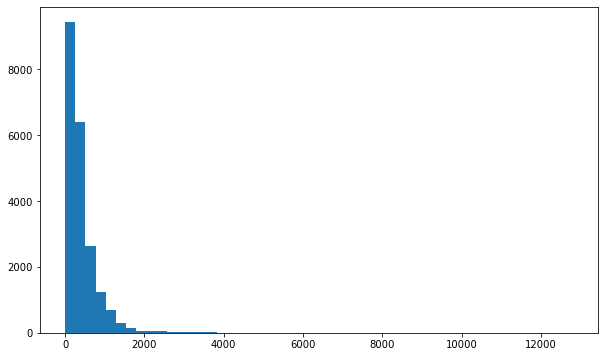

In [17]:
# Write your code here to visualise the data according to the 'Complaint' character length
plt.figure(figsize=(10,6))
doc_lens = [len(d) for d in df_clean.complaint_POS_removed]
plt.hist(doc_lens, bins = 50)
plt.show()

#### Find the top 40 words by frequency among all the articles after processing the text.

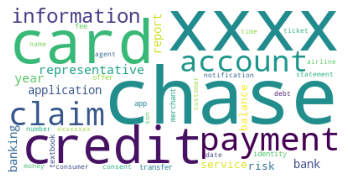

In [18]:
#Using a word cloud find the top 40 words by frequency among all the articles after processing the text
stoplist = set(stopwords.words("english"))
wordcloud = WordCloud(stopwords=stoplist,max_words=40, background_color='white').generate(str(df_clean.complaint_POS_removed))

#print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show();

In [19]:
df_clean

,complaints,lemmatized_complaints,complaint_POS_removed
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,good morning name xxxx xxxx appreciate could help put stop chase bank cardmember service wrote chase asking debt verification sent statement acceptable asking bank validate debt instead receiving mail every month attempting collect debt right know information consumer chase account xxxx xxxx xxxx xxxx thanks advance help,morning name stop debt verification statement bank debt mail month debt right information consumer chase xxxx xxxx xxxx xxxx thanks advance help
2,i upgraded my xxxx xxxx card in xxxx and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,upgraded xxxx xxxx card xxxx told agent upgrade anniversary date would change turned agent giving wrong information order upgrade account xxxx changed anniversary date xxxxxxxx xxxxxxxx without consent xxxx recording agent misled,xxxx card agent anniversary date agent information order account anniversary date consent xxxx recording agent
10,chase card was reported on xxxx however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,chase card reported xxxx however fraudulent application submitted identity without consent fraudulently obtain service extend credit without verifying identity applicant,application identity consent services credit identity applicant
11,on xxxx while trying to book a xxxx xxxx ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted xxxx and was referred to chase bank i then immediately contacted chase bank within no more than minutes of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the xxxx offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then explicitly told...,xxxx trying book xxxx xxxx ticket came across offer applied towards ticket applied reward card put information offer within le minute notified via screen decision could made immediately contacted xxxx referred chase bank immediately contacted chase bank within minute getting notification screen told chase representative spoke application denied could state asked information xxxx offer explained even approved credit offer get applied first account statement could used purchase ticket explicitly told glad got denied absolutely longer interested account asked application withdrawn representative obliged happened later min putting application xxxx notwithstanding explicit request proceed application contrary told chase representative chase fact go ahead open credit account name xxxx report...,xxxx xxxx xxxx ticket offer ticket rewards card information offer minute screen decision chase bank minutes notification screen representative application information offer credit offer account statement ticket account application representative mins application

In [20]:
#Removing -PRON- from the text corpus
df_clean['Complaint_clean'] = df_clean['complaint_POS_removed'].str.replace('-PRON-', '')

In [21]:
df_clean

,complaints,lemmatized_complaints,complaint_POS_removed,Complaint_clean
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,good morning name xxxx xxxx appreciate could help put stop chase bank cardmember service wrote chase asking debt verification sent statement acceptable asking bank validate debt instead receiving mail every month attempting collect debt right know information consumer chase account xxxx xxxx xxxx xxxx thanks advance help,morning name stop debt verification statement bank debt mail month debt right information consumer chase xxxx xxxx xxxx xxxx thanks advance help,morning name stop debt verification statement bank debt mail month debt right information consumer chase xxxx xxxx xxxx xxxx thanks advance help
2,i upgraded my xxxx xxxx card in xxxx and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,upgraded xxxx xxxx card xxxx told agent upgrade anniversary date would change turned agent giving wrong information order upgrade account xxxx changed anniversary date xxxxxxxx xxxxxxxx without consent xxxx recording agent misled,xxxx card agent anniversary date agent information order account anniversary date consent xxxx recording agent,xxxx card agent anniversary date agent information order account anniversary date consent xxxx recording agent
10,chase card was reported on xxxx however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,chase card reported xxxx however fraudulent application submitted identity without consent fraudulently obtain service extend credit without verifying identity applicant,application identity consent services credit identity applicant,application identity consent services credit identity applicant
11,on xxxx while trying to book a xxxx xxxx ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted xxxx and was referred to chase bank i then immediately contacted chase bank within no more than minutes of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the xxxx offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then explicitly told...,xxxx trying book xxxx xxxx ticket came across offer applied towards ticket applied reward card put information offer within le minute notified via screen decision could made immediately contacted xxxx referred chase bank immediately contacted chase bank within minute getting notification screen told chase representative spoke application denied could state asked information xxxx offer explained even approved credit offer get applied first account statement could used purchase ticket explicitly told glad got denied absolutely longer interested account asked application withdrawn representative obliged happened later min putting application xxxx notwithstanding explicit request proceed application contrary told chase r

#### Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text.

In [22]:
#Write your code here to find the top 30 unigram frequency among the complaints in the cleaned datafram(df_clean). 
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(1, 1), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_bigram(df_clean['Complaint_clean'], 30)

In [23]:
#Print the top 10 words in the unigram frequency
df_unigram = pd.DataFrame(common_words, columns = ['unigram' , 'count'])
df_unigram.iloc[:10,:]

,unigram,count
0,xxxx,140012
1,chase,54073
2,account,40565
3,credit,31646
4,card,25806
5,bank,17851
6,xxxxxxxx,15343
7,payment,13754
8,money,11806
9,time,11692


In [24]:
#Write your code here to find the top 30 unigram frequency among the complaints in the cleaned datafram(df_clean). 
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_bigram(df_clean['Complaint_clean'], 30)

In [25]:
#Print the top 10 words in the bigram frequency
df_bigram = pd.DataFrame(common_words, columns = ['bigram' , 'count'])
df_bigram.iloc[:10,:]

,bigram,count
0,xxxx xxxx,64600
1,credit card,10652
2,xxxx chase,4317
3,account xxxx,3288
4,credit report,3197
5,chase credit,3009
6,customer service,2984
7,chase xxxx,2845
8,chase account,2776
9,xxxx account,2576


In [26]:
#Write your code here to find the top 30 trigram frequency among the complaints in the cleaned datafram(df_clean). 
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_bigram(df_clean['complaints'], 30)

In [27]:
#Print the top 10 words in the trigram frequency
df_trigram = pd.DataFrame(common_words, columns = ['trigram' , 'count'])
df_trigram.iloc[:10,:]

,trigram,count
0,xxxx xxxx xxxx,37868
1,jp morgan chase,2284
2,chase credit card,1779
3,xxxx xxxx chase,1644
4,xxxxxxxx xxxx xxxx,1572
5,xxxx xxxx xxxxxxxx,1263
6,chase xxxx xxxx,1111
7,chase bank xxxx,1060
8,xxxx xxxxxxxx xxxx,954
9,account xxxx xxxx,908


## The personal details of customer has been masked in the dataset with xxxx. Let's remove the masked text as this will be of no use for our analysis

In [28]:
df_clean['Complaint_clean'] = df_clean['Complaint_clean'].str.replace('xxxx','')

In [29]:
#All masked texts has been removed
df_clean

,complaints,lemmatized_complaints,complaint_POS_removed,Complaint_clean
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,good morning name xxxx xxxx appreciate could help put stop chase bank cardmember service wrote chase asking debt verification sent statement acceptable asking bank validate debt instead receiving mail every month attempting collect debt right know information consumer chase account xxxx xxxx xxxx xxxx thanks advance help,morning name stop debt verification statement bank debt mail month debt right information consumer chase xxxx xxxx xxxx xxxx thanks advance help,morning name stop debt verification statement bank debt mail month debt right information consumer chase thanks advance help
2,i upgraded my xxxx xxxx card in xxxx and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,upgraded xxxx xxxx card xxxx told agent upgrade anniversary date would change turned agent giving wrong information order upgrade account xxxx changed anniversary date xxxxxxxx xxxxxxxx without consent xxxx recording agent misled,xxxx card agent anniversary date agent information order account anniversary date consent xxxx recording agent,card agent anniversary date agent information order account anniversary date consent recording agent
10,chase card was reported on xxxx however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,chase card reported xxxx however fraudulent application submitted identity without consent fraudulently obtain service extend credit without verifying identity applicant,application identity consent services credit identity applicant,application identity consent services credit identity applicant
11,on xxxx while trying to book a xxxx xxxx ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted xxxx and was referred to chase bank i then immediately contacted chase bank within no more than minutes of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the xxxx offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then explicitly told...,xxxx trying book xxxx xxxx ticket came across offer applied towards ticket applied reward card put information offer within le minute notified via screen decision could made immediately contacted xxxx referred chase bank immediately contacted chase bank within minute getting notification screen told chase representative spoke application denied could state asked information xxxx offer explained even approved credit offer get applied first account statement could used purchase ticket explicitly told glad got denied absolutely longer interested account asked application withdrawn representative obliged happened later min putting application xxxx notwithstanding explicit request proceed application contrary told chase representative chase fact go ah

## Feature Extraction
Convert the raw texts to a matrix of TF-IDF features

**max_df** is used for removing terms that appear too frequently, also known as "corpus-specific stop words"
max_df = 0.95 means "ignore terms that appear in more than 95% of the complaints"

**min_df** is used for removing terms that appear too infrequently
min_df = 2 means "ignore terms that appear in less than 2 complaints"

In [30]:
# Transform word vector in tfidf vector
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=2)
tfidf = vectorizer.fit_transform(df_clean.Complaint_clean) 

#### Create a document term matrix using fit_transform

The contents of a document term matrix are tuples of (complaint_id,token_id) tf-idf score:
The tuples that are not there have a tf-idf score of 0

In [31]:
#Write your code here to create the Document Term Matrix by transforming the complaints column present in df_clean
dtm = pd.DataFrame(tfidf.toarray(), columns=vectorizer.get_feature_names())

In [32]:
dtm

,aa,aaaratings,aarp,abandonment,abatement,abd,abide,abilities,ability,abs,...,yoga,youth,yr,yrs,zeros,zip,zipcode,zombie,zone,zones
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21067,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
21068,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
21069,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
21070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.147568,0.0,0.0,0.0,0.0,0.0,0.0


## Topic Modelling using NMF

Non-Negative Matrix Factorization (NMF) is an unsupervised technique so there are no labeling of topics that the model will be trained on. The way it works is that, NMF decomposes (or factorizes) high-dimensional vectors into a lower-dimensional representation. These lower-dimensional vectors are non-negative which also means their coefficients are non-negative.

In this task you have to perform the following:

* Find the best number of clusters 
* Apply the best number to create word clusters
* Inspect & validate the correction of each cluster wrt the complaints 
* Correct the labels if needed 
* Map the clusters to topics/cluster names

## Manual Topic Modeling
You need to do take the trial & error approach to find the best num of topics for your NMF model.

The only parameter that is required is the number of components i.e. the number of topics we want. This is the most crucial step in the whole topic modeling process and will greatly affect how good your final topics are.

In [33]:
#Load your nmf_model with the n_components i.e 5
n_components = 5

#keep the random_state =40
nmf_model = NMF(n_components = 5, random_state = 40 )

In [34]:
W = nmf_model.fit(dtm)  # Document-topic matrix
H = nmf_model.components_        # Topic-term matrix

In [35]:
#Print the Top15 words for each of the topics
words = np.array(vectorizer.get_feature_names())
topic_words = pd.DataFrame(np.zeros((n_components, 15)), index=[f'Topic {i + 1}' for i in range(n_components)],
                           columns=[f'Word {i + 1}' for i in range(15)]).astype(str)
for i in range(n_components):
    ix = H[i].argsort()[::-1][:15]
    topic_words.iloc[i] = words[ix]

topic_words

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15
Topic 1,account,bank,check,money,chase,funds,branch,checking,deposit,accounts,number,business,days,checks,fraud
Topic 2,credit,report,inquiry,card,inquiries,score,cards,accounts,account,debt,information,reporting,limit,bureaus,reports
Topic 3,loan,mortgage,chase,home,modification,property,payments,foreclosure,years,house,rate,letter,time,documents,sale
Topic 4,card,chase,charges,charge,credit,dispute,fraud,merchant,transaction,company,purchase,fee,service,phone,number
Topic 5,payment,payments,balance,month,fees,fee,statement,auto,date,time,chase,days,account,error,months


In [36]:
df_clean2 = df_clean

In [37]:
#Create the best topic for each complaint in terms of integer value 0,1,2,3 & 4
topic_results = nmf_model.transform(dtm)
topic_results[0].round(2)
topic_results[0].argmax()
topic_results.argmax(axis=1)

array([2, 3, 1, ..., 3, 4, 4])

In [38]:
#Assign the best topic to each of the cmplaints in Topic Column
df_clean2['Topic'] = topic_results.argmax(axis=1) 

In [39]:
#Print the first 5 Complaint for each of the Topics
df_clean3=df_clean2.groupby('Topic').head(5)
df_clean3.sort_values('Topic')

,complaints,lemmatized_complaints,complaint_POS_removed,Complaint_clean,Topic
27,i opened an account with chase bank on xxxx and used a code for xxxx bonus i called to follow up on xxxxxxxx about the terms and was told everything was on the account and once i made xxxx direct deposit the bonus would be paid out in days as of xxxx i had made the required deposits and was told my account never had the coupon code applied and it was past the days to do so so no bonus would be paid,opened account chase bank xxxx used code xxxx bonus called follow xxxxxxxx term told everything account made xxxx direct deposit bonus would paid day xxxx made required deposit told account never coupon code applied past day bonus would paid,account code xxxx bonus xxxxxxxx terms account deposit bonus days xxxx deposits account coupon code days bonus,account code bonus terms account deposit bonus days deposits account coupon code days bonus,0
14,my grand son give me check for i deposit it into my chase account after fund clear my chase bank closed my account never paid me my money they said they need to speek with my grand son check was clear money was taking by my chase bank refuse to pay me my money my grand son called chase times they told him i should call not him to verify the check owner he is out the country most the time date happen xxxx check number xxxx claim number is xxxx with chase,grand son give check deposit chase account fund clear chase bank closed account never paid money said need speek grand son check clear money taking chase bank refuse pay money grand son called chase time told call verify check owner country time date happen xxxx check number xxxx claim number xxxx chase,son chase account fund chase bank account money son check money chase bank money son times check owner country time date xxxx number xxxx claim number xxxx chase,son chase account fund chase bank account money son check money chase bank money son times check owner country time date number claim number chase,0
17,with out notice jp morgan chase restricted my account by my debit card tuesday xxxx on thursday xxxx i went into a branch after being advised by a customer service representative that my account would actually be closed i went into the branch to see how i can remove the funds that are in there currently in as well as if my direct deposit from my place of employment would be returned the bank associate and the customer service representative assured me that the funds would post but they may take an additional business day that saturday i attempted to go inside of a branch yet again to retrieve my funds that actually did post on friday xxxx upon looking at my account i realize that the funds have been reversed and no longer were present on my current statement ive been called and i was t...,notice jp morgan chase restricted account debit card tuesday xxxx thursday xxxx went branch advised customer service representative account would actually closed went branch see remove fund currently well direct deposit place employment would returned bank associate customer service representative assured fund would post may take additional business day saturday attempted go inside branch yet retrieve fund actually post friday xxxx upon looking account realize fund reversed longer present current statement ive called told may take two business day stating tuesday xxxxxxxx would date fund would available withdraw bank teller chase informing mailed check three business day recover fund owed left account currently unfortunately put additional financial bind two fee late rent late car paym...,notice account debit card branch customer service representative account branch funds deposit place employment bank associate customer service representative funds business day branch funds account funds statement business day date funds bank teller chase check business days funds account bind fees rent car payments notice things peace mind fact chase situation bank teller account look c

#### After evaluating the mapping, if the topics assigned are correct then assign these names to the relevant topic:
* Bank Account services
* Credit card or prepaid card
* Theft/Dispute Reporting
* Mortgage/Loan
* Others

In [40]:
df_clean4 = df_clean2.copy(deep=True)

In [41]:
#Create the dictionary of Topic names and Topics
Topic_names = {  
        0 : 'Bank Account services',
        1 : 'Credit card or prepaid card',
        2 : 'Mortgage/Loan',
        3 : 'Theft/Dispute Reporting',
        4 : 'Others'}

#Replace Topics with Topic Names
df_clean4['Topic'] = df_clean4['Topic'].map(Topic_names)

In [42]:
df_clean4

,complaints,lemmatized_complaints,complaint_POS_removed,Complaint_clean,Topic
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,good morning name xxxx xxxx appreciate could help put stop chase bank cardmember service wrote chase asking debt verification sent statement acceptable asking bank validate debt instead receiving mail every month attempting collect debt right know information consumer chase account xxxx xxxx xxxx xxxx thanks advance help,morning name stop debt verification statement bank debt mail month debt right information consumer chase xxxx xxxx xxxx xxxx thanks advance help,morning name stop debt verification statement bank debt mail month debt right information consumer chase thanks advance help,Mortgage/Loan
2,i upgraded my xxxx xxxx card in xxxx and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,upgraded xxxx xxxx card xxxx told agent upgrade anniversary date would change turned agent giving wrong information order upgrade account xxxx changed anniversary date xxxxxxxx xxxxxxxx without consent xxxx recording agent misled,xxxx card agent anniversary date agent information order account anniversary date consent xxxx recording agent,card agent anniversary date agent information order account anniversary date consent recording agent,Theft/Dispute Reporting
10,chase card was reported on xxxx however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,chase card reported xxxx however fraudulent application submitted identity without consent fraudulently obtain service extend credit without verifying identity applicant,application identity consent services credit identity applicant,application identity consent services credit identity applicant,Credit card or prepaid card
11,on xxxx while trying to book a xxxx xxxx ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted xxxx and was referred to chase bank i then immediately contacted chase bank within no more than minutes of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the xxxx offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then explicitly told...,xxxx trying book xxxx xxxx ticket came across offer applied towards ticket applied reward card put information offer within le minute notified via screen decision could made immediately contacted xxxx referred chase bank immediately contacted chase bank within minute getting notification screen told chase representative spoke application denied could state asked information xxxx offer explained even approved credit offer get applied first account statement could used purchase ticket explicitly told glad got denied absolutely longer interested account asked application withdrawn representative obliged happened later min putting application xxxx notwithstanding explicit request

In [43]:
# Checking the value count of each topic
df_clean4['Topic'].value_counts(dropna=False)

Theft/Dispute Reporting        6094
Bank Account services          5531
Mortgage/Loan                  3639
Credit card or prepaid card    3548
Others                         2260
Name: Topic, dtype: int64

## Supervised model to predict any new complaints to the relevant Topics.

You have now build the model to create the topics for each complaints.Now in the below section you will use them to classify any new complaints.

Since you will be using supervised learning technique we have to convert the topic names to numbers(numpy arrays only understand numbers)

In [44]:
#Keep the columns"complaint_what_happened" & "Topic" only in the new dataframe --> training_data
training_data=df_clean2[['complaints','Topic']]

In [45]:
training_data

,complaints,Topic
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,2
2,i upgraded my xxxx xxxx card in xxxx and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,3
10,chase card was reported on xxxx however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,1
11,on xxxx while trying to book a xxxx xxxx ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted xxxx and was referred to chase bank i then immediately contacted chase bank within no more than minutes of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the xxxx offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then explicitly told...,1
14,my grand son give me check for i deposit it into my chase account after fund clear my chase bank closed my account never paid me my money they said they need to speek with my grand son check was clear money was taking by my chase bank refuse to pay me my money my grand son called chase times they told him i should call not him to verify the check owner he is out the country most the time date happen xxxx check number xxxx claim number is xxxx with chase,0
...,...,...
78303,after being a chase card customer for well over a decade was offered multiple solicitations for acquiring new credit cards with chase all with bonus airline miles and hotel points was approved for all new cards with no annual fee for st year after less than months with payment always paid as agreed chase closed all my cards one of my approved new cards was never activated but was sent to me\n\nchase has done harm to my credit has charged me an annual fee even though they cancelled my account failed to credit my points for both airlines and hotel failed to credit up to for xxxx enrollment and failed to credit airline charge as agreed upon,3
78309,on wednesday xxxxxxxx i called chas my xxxx xxxx visa credit card provider and asked how to make a claim under their purchase protection benefit on xxxxxxxx i purchased three high school textbooks for my xxxx year old daughter because she transferred to a new school all three books were damaged when a water bottle in her backpack broke the chase representative assured me the textbooks would be covered and instructed me to file a claim at xxxx i immediately went to the website and filed the claim including uploading all of the requested paperwork which included a copy of my credit card statement copies of the three receipts and photographic evidence of the damage the website even had books as one of the catagories i could list as the type of item they cover and that i could make a cla...,3
78310,i am not familiar with xxxx pay and did not understand the great risk this provides to consumers i believed this to be safe as it was through my chase bank app i have been with chase for almost 

####Apply the supervised models on the training data created. In this process, you have to do the following:
* Create the vector counts using Count Vectoriser
* Transform the word vecotr to tf-idf
* Create the train & test data using the train_test_split on the tf-idf & topics


In [46]:
#Write your code to get the Vector count
count_vect = CountVectorizer()
X = count_vect.fit_transform(training_data.complaints)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X)
y = training_data.Topic 

You have to try atleast 2 models on the train & test data from these options:
* Logistic regression
* Decision Tree
* Random Forest
* Naive Bayes (optional)

**Using the required evaluation metrics judge the tried models and select the ones performing the best**

In [47]:
# Write your code here to build any 3 models and evaluate them using the required metrics
# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, y, test_size=0.20, random_state=40)

### Naive Bayes

In [48]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# fit function is used to train the model using the training sets as parameters
clf = MultinomialNB().fit(X_train, y_train)

# performing predictions on the test dataset
predicted_bayes = clf.predict(X_test)

In [49]:
print("Accuracy ", round(metrics.accuracy_score(y_test, predicted_bayes),2))
print("F1 Score", round(metrics.f1_score(y_test, predicted_bayes, average = 'micro'),2)) #Global

Accuracy  0.67
F1 Score 0.67


### Logistic regression

In [50]:
from sklearn.linear_model import LogisticRegression

# creating a Logistic Regression Model
logisticRegr = LogisticRegression(solver='liblinear')

# fit function is used to train the model using the training sets as parameters
lr = logisticRegr.fit(X_train, y_train)

# performing predictions on the test dataset
predicted_lr = lr.predict(X_test)

In [51]:
print("Accuracy ", round(metrics.accuracy_score(y_test, predicted_lr),2))
print("F1 Score", round(metrics.f1_score(y_test, predicted_lr, average = 'micro'),2)) #Global

Accuracy  0.93
F1 Score 0.93


### Decision tree

In [52]:
from sklearn.tree import DecisionTreeClassifier

# creating a Decision Tree classifier
clf = DecisionTreeClassifier(max_depth =6, random_state = 42)

# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=42)

In [53]:
# performing predictions on the test dataset
predicted_tree = clf.predict(X_test)

In [54]:
print("Accuracy", round(metrics.accuracy_score(y_test, predicted_tree),2))
print("F1 Score", round(metrics.f1_score(y_test, predicted_tree, average = 'micro'),2)) #Global

Accuracy 0.75
F1 Score 0.75


### Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)  
  
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
  
# performing predictions on the test dataset
predicted_rf = clf.predict(X_test)

In [56]:
# using metrics module for accuracy calculation
print("Accuracy", round(metrics.accuracy_score(y_test, predicted_rf),2))
print("F1 Score", round(metrics.f1_score(y_test, predicted_rf, average = 'micro'),2)) #Global

Accuracy 0.81
F1 Score 0.81


### Final model selection:
Since, Logistic regression outperforms the others with 92% accuracy and F1 score, we select it as the final model. Its also less computationally expensive and interpretable. 

### Custom Text Prediction

In [57]:
d = {'Text': ['Credit card fraud can be authorised, where the genuine customer themselves processes a payment to another account which is controlled by a criminal, or unauthorised, where the account holder does not provide authorisation for the payment to proceed and the transaction is carried out by a third party.']}
df_test = pd.DataFrame(data=d)

In [58]:
X2 = count_vect.transform(df_test.Text)
X_train_tfidf = tfidf_transformer.transform(X2)
df_test['Predicted'] = lr.predict(X_train_tfidf)

In [59]:
d2 = {'Text': ['I want to increase the transaction limit for my credit card.']}
df_test2 = pd.DataFrame(data=d2)

In [60]:
X3 = count_vect.transform(df_test2.Text)
X_train_tfidf2 = tfidf_transformer.transform(X3)
df_test2['Predicted'] = lr.predict(X_train_tfidf2)

In [61]:
df_test = df_test.append(df_test2, ignore_index=True)

In [62]:
d3 = {'Text': ['Unable to get a mortgage loan from the chase bank branch.']}
df_test3 = pd.DataFrame(data=d3)

In [63]:
X4 = count_vect.transform(df_test3.Text)
X_train_tfidf3 = tfidf_transformer.transform(X4)
df_test3['Predicted'] = lr.predict(X_train_tfidf3)

In [64]:
df_test = df_test.append(df_test3 , ignore_index=True)

In [65]:
Topic_names = {  
        0 : 'Bank Account services',
        1 : 'Credit card or prepaid card',
        2 : 'Mortgage/Loan',
        3 : 'Theft/Dispute Reporting',
        4 : 'Others'}

#Replace Topics with Topic Names
df_test['Predicted'] = df_test['Predicted'].map(Topic_names)

In [66]:
df_test

,Text,Predicted
0,"Credit card fraud can be authorised, where the genuine customer themselves processes a payment to another account which is controlled by a criminal, or unauthorised, where the account holder does not provide authorisation for the payment to proceed and the transaction is carried out by a third party.",Others
1,I want to increase the transaction limit for my credit card.,Credit card or prepaid card
2,Unable to get a mortgage loan from the chase bank branch.,Mortgage/Loan
